### Import Library

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib


### Import Data

In [2]:
# Membaca file Excel yang diunggah oleh user
file_path = '../scraping/data_gti_tpt_imputed_3n.xlsx'
data = pd.read_excel(file_path)
data

,Tahun,Lowongan Kerja,TPT
0,2010,65.25,7.48
1,2011,81.00,10.59
2,2012,65.25,6.12
3,2013,75.00,6.89
4,2014,81.00,8.47
5,2015,52.50,9.52
6,2016,52.00,8.94
7,2017,65.25,7.33
8,2018,51.50,8.24
9,2019,55.50,8.12


### Split

In [10]:
target = 'TPT'
exog_vars = data[['Lowongan Kerja']]

train_data = data[data['Tahun'].between(2010, 2021)].drop(columns=['Tahun'])
test_data = data[data['Tahun'].between(2022, 2023)].drop(columns=['Tahun'])

In [4]:
train_data

,Lowongan Kerja,TPT
0,65.25,7.48
1,81.00,10.59
2,65.25,6.12
3,75.00,6.89
4,81.00,8.47
5,52.50,9.52
6,52.00,8.94
7,65.25,7.33
8,51.50,8.24
9,55.50,8.12


In [5]:
test_data

,Lowongan Kerja,TPT
12,51.0,9.64
13,67.0,8.60


### Modelling

In [13]:
X_train = train_data[['Lowongan Kerja']]
y_train = train_data[['TPT']]
X_test = test_data[['Lowongan Kerja']]
y_test = test_data[['TPT']]

In [17]:
models = {
    "Random Forest_Pengangguran": RandomForestRegressor(random_state=42),
    "Gradient Boosting_Pengangguran": GradientBoostingRegressor(random_state=42),
    "XGBoost_Pengangguran": XGBRegressor(random_state=42, objective='reg:squarederror')
}

param_grid = {
    "Random Forest_Pengangguran": {
        'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
        'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45]
    },
    "Gradient Boosting_Pengangguran": {
        'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
        'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    },
    "XGBoost_Pengangguran": {
        'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
        'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    }
}

Running

In [18]:
best_models = {}
model_results = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    y_pred = best_models[name].predict(X_test)
    model_results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Best Params": grid_search.best_params_
    }

c:\Users\fezaa\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\fezaa\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [19]:
best_models

{'Random Forest_Pengangguran': RandomForestRegressor(n_estimators=150, random_state=42),
 'Gradient Boosting_Pengangguran': GradientBoostingRegressor(learning_rate=0.01, max_depth=4, random_state=42),
 'XGBoost_Pengangguran': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=450, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)}

### Model Terbaik

In [20]:
# Forecasting untuk tahun 2024
forecast_2024 = data[data['Tahun'] == 2024].copy()
forecast_2024[target] = None

In [22]:
forecast_2024[['Lowongan Kerja']]

,Lowongan Kerja
14,59.0


In [23]:
# Langkah 3: Lakukan prediksi menggunakan model terbaik berdasarkan MAE
best_model_name = min(model_results, key=lambda k: model_results[k]["MAE"])
best_model = best_models[best_model_name]


In [25]:
forecast_2024['TPT'] = best_model.predict(forecast_2024[['Lowongan Kerja']])

forecast_2024[['Tahun', 'TPT']]

,Tahun,TPT
14,2024,8.322213


In [26]:
# Menampilkan hasil evaluasi model dan prediksi untuk tahun 2024
model_results, forecast_2024[['Tahun', 'TPT']]

({'Random Forest_Pengangguran': {'MAE': 1.3415463492063413,
   'RMSE': 1.3543168221552402,
   'MAPE': 0.14874296543410614,
   'R2': -5.783188072384117,
   'Best Params': {'max_depth': None, 'n_estimators': 150}},
  'Gradient Boosting_Pengangguran': {'MAE': 1.1995436141787983,
   'RMSE': 1.2053573454582165,
   'MAPE': 0.13121624181478053,
   'R2': -4.373100333765073,
   'Best Params': {'learning_rate': 0.01,
    'max_depth': 4,
    'n_estimators': 100}},
  'XGBoost_Pengangguran': {'MAE': 1.4694946956634523,
   'RMSE': 1.475134553487185,
   'MAPE': 0.16246265135572463,
   'R2': -7.047418457440209,
   'Best Params': {'learning_rate': 0.01,
    'max_depth': 4,
    'n_estimators': 450}}},
     Tahun       TPT
 14   2024  8.322213)

### Plot Forecasting

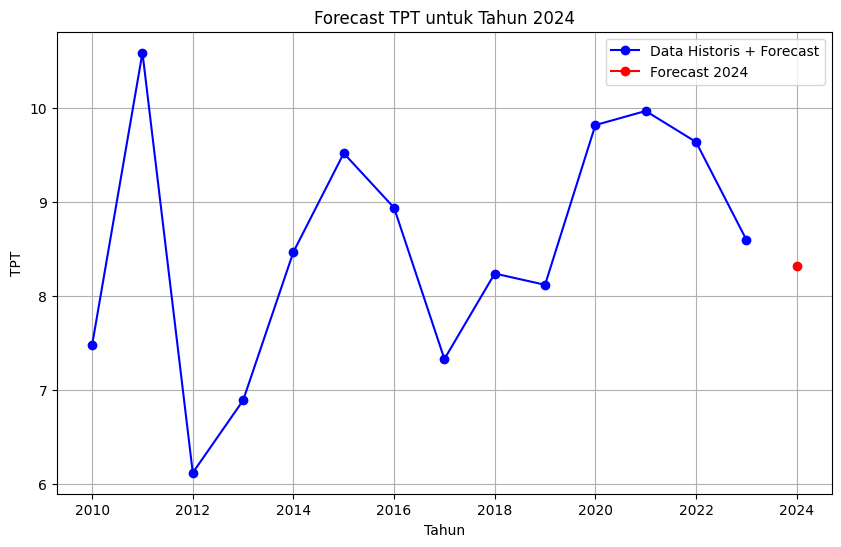

In [29]:
# Menggabungkan data asli dan data forecasting untuk plot
historical_data = data[['Tahun', 'TPT']]
forecast_2024_data = forecast_2024[['Tahun', 'TPT']]

# Gabungkan data historis dan hasil forecast
combined_data = pd.concat([historical_data, forecast_2024_data])

# Plot data historis dan hasil forecast sebagai satu garis yang tersambung
plt.figure(figsize=(10, 6))
plt.plot(historical_data['Tahun'], historical_data['TPT'], marker='o', color='blue', label='Data Historis + Forecast')
plt.plot(forecast_2024_data['Tahun'], forecast_2024_data['TPT'], marker='o', color='red', label='Forecast 2024')

# Menambahkan judul dan label
plt.title('Forecast TPT untuk Tahun 2024')
plt.xlabel('Tahun')
plt.ylabel('TPT')
plt.legend()
plt.grid(True)
plt.show()

### Hasil Setiap Model

In [30]:
# Dictionary untuk menyimpan hasil forecast dari setiap model
forecast_results = {}

# Langkah 3: Melakukan forecast untuk tahun 2024 menggunakan setiap model yang sudah di-tuning
for name, model in best_models.items():
    forecast_2024[target] = model.predict(forecast_2024[['Lowongan Kerja']])
    forecast_results[name] = forecast_2024[target].values[0]  # Simpan hasil prediksi untuk tahun 2024

# Tampilkan hasil forecasting dari setiap model
for model_name, forecast_value in forecast_results.items():
    print(f"Forecast 'Persentase Kemiskinan' tahun 2024 oleh {model_name}: {forecast_value:.4f}")


Forecast 'Persentase Kemiskinan' tahun 2024 oleh Random Forest_Pengangguran: 8.4840
Forecast 'Persentase Kemiskinan' tahun 2024 oleh Gradient Boosting_Pengangguran: 8.3222
Forecast 'Persentase Kemiskinan' tahun 2024 oleh XGBoost_Pengangguran: 8.2994


### Menyimpan Model

In [32]:
import joblib

# Simpan model terbaik dari setiap metode
for name, model in best_models.items():
    filename = f'{name}.pkl'
    joblib.dump(model, filename)
    print(f'Model {name} berhasil disimpan sebagai {filename}')


Model Random Forest_Pengangguran berhasil disimpan sebagai Random Forest_Pengangguran.pkl
Model Gradient Boosting_Pengangguran berhasil disimpan sebagai Gradient Boosting_Pengangguran.pkl
Model XGBoost_Pengangguran berhasil disimpan sebagai XGBoost_Pengangguran.pkl


#### Input Query

In [41]:
import joblib

best_models = {
    'Random Forest': joblib.load('Random Forest_Pengangguran.pkl'),
    'Gradient Boosting': joblib.load('Gradient Boosting_Pengangguran.pkl'),
    'XGBoost': joblib.load('XGBoost_Pengangguran.pkl')
}

### Semua Model

In [64]:
def forecast_tpt_all(new_input):
    forecast_results = {}
    new_input_reshaped = [new_input]  # Reshaping input to a 2D array
    for name, model in best_models.items():
        forecast_value = model.predict(new_input_reshaped)
        forecast_results[name] = forecast_value[0]

    return forecast_results

### Hanya Satu Model Terbaik

In [46]:
# model terbaik xgboost
def forecast_tpt(new_input):
    forecast_value = joblib.load('XGBoost_Pengangguran.pkl').predict(new_input)
    # Return the forecasted value
    return forecast_value[0]  # Assuming the model returns an array-like structure

### Testing

In [65]:
import random

new_input_2024 = [random.randint(1, 100) for _ in range(8)]

query = [59]

All Model

In [73]:
forecast_2024 = forecast_tpt_all(query)

forecast_2024

c:\Users\fezaa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\fezaa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


{'Random Forest': 8.691397777777771,
 'Gradient Boosting': 8.243535915179715,
 'XGBoost': 8.206835}

Satu Model

In [62]:
forecast_2024 = forecast_tpt(new_input_2024)

forecast_2024

7.001636